## Описание проекта

Федеральный оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных

Импортируем библиотеку `pandas` и прочитаем файлы `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv` и `users.csv`. Затем для каждой таблицы выведем первые и последние строки, общую информацию, названия колонок и описание данных в столбцах.

In [1]:
# Библиотеку Numpy мы используем в дальнейшем для округления чисел
import numpy as np
# Библиотеку Scipy мы используем в дальнейшем для проверки гипотез
from scipy import stats as st
import pandas as pd

try:
    df_calls = pd.read_csv('calls.csv')
    df_internet = pd.read_csv('internet.csv')
    df_messages = pd.read_csv('messages.csv')
    df_tariffs = pd.read_csv('tariffs.csv')
    df_users = pd.read_csv('users.csv')
except:
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')

+ Изучим общую информацию о таблице <b>df_calls</b>

In [2]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
df_calls.tail(10)

,id,call_date,duration,user_id
202597,1499_210,2018-10-02,8.86,1499
202598,1499_211,2018-12-29,4.58,1499
202599,1499_212,2018-12-30,1.35,1499
202600,1499_213,2018-10-17,10.77,1499
202601,1499_214,2018-12-05,2.42,1499
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

Описание данных в столбцах таблицы `df_calls`:
+ `id` — уникальный номер звонка
+ `call_date` — дата звонка
+ `duration` — длительность звонка в минутах
+ `user_id` — идентификатор пользователя, сделавшего звонок

+ Изучим общую информацию о таблице <b>df_internet</b>

In [6]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
df_internet.tail(10)

,Unnamed: 0,id,mb_used,session_date,user_id
149386,149386,1499_147,0.00,2018-10-21,1499
149387,149387,1499_148,268.19,2018-11-13,1499
149388,149388,1499_149,778.68,2018-11-24,1499
149389,149389,1499_150,273.98,2018-11-20,1499
149390,149390,1499_151,752.72,2018-10-11,1499
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
df_internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Описание данных в столбцах таблицы `df_internet`:
+ `id` — уникальный номер сессии
+ `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
+ `session_date` — дата интернет-сессии
+ `user_id` — идентификатор пользователя

+ Изучим общую информацию о таблице <b>df_messages</b>

In [10]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
df_messages.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
df_messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

Описание данных в столбцах таблицы `df_messages`:
+ `id` — уникальный номер сообщения
+ `message_date` — дата сообщения
+ `user_id` — идентификатор пользователя, отправившего сообщение

+ Изучим общую информацию о таблице <b>df_tariffs</b>

In [14]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
df_tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Описание данных в столбцах таблицы `df_tariffs`:
+ `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
+ `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
+ `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
+ `rub_monthly_fee` — ежемесячная абонентская плата в рублях
+ `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
+ `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
+ `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
+ `tariff_name` — название тарифа

+ Изучим общую информацию о таблице <b>df_users</b>

In [17]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [18]:
df_users.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
df_users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Описание данных в столбцах таблицы `df_users`:
+ `user_id` — уникальный идентификатор пользователя
+ `age` — возраст пользователя (годы)
+ `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
+ `city` — город проживания пользователя
+ `first_name` — имя пользователя
+ `last_name` — фамилия пользователя
+ `reg_date` — дата подключения тарифа (день, месяц, год)
+ `tariff` — название тарифного плана

<b>ИТОГО</b>
+ Все данные представленны в 5 разных таблицах
+ Пропуски есть только в столбце `churn_date` таблицы `df_users`
+ Все столбцы с датами нужно будет привести из типа `object` к типу `datetime`
+ Присутствует лишний дублирующий столбец `Unnamed: 0` в таблице `df_internet`
+ Названия остальных колонок корректные

## Подготовка данных

Посчитаем количество пропущенных значений в таблицах `df_calls`, `df_messages`, `df_internet` и `df_users`. Таблицу `df_tariffs` проверять не будем, так как там всего 2 строки и там и так всё видно и понятно.

In [21]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [22]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [23]:
df_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [24]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Столбец с датой прекращения пользования тарифом почти не заполнен, но это никак не повлияет на наше исследование, оставим его без изменений. В остальных таблицах пропущенные значения отсутствуют. Теперь проверим количество явных дубликатов.

In [25]:
[
    df_calls.duplicated().sum(),
    df_messages.duplicated().sum(),
    df_internet.duplicated().sum(),
    df_users.duplicated().sum()
]

[0, 0, 0, 0]

Дубликатов нет.

Во всех таблицах, столбцы хранящие даты имеют тип `object`. Приведём их к типу `datetime`.

In [26]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

В столбце `duration` таблицы `df_calls` хранится длительность звонков в минутах, но при этом значения имеют тип `float`. А это значит, что цифры после запятой обозначают секунды. В задании говорится, что «Мегалайн» всегда округляет секунды до минут (даже если звонок длился всего 1 секунду) и каждый звонок округляется отдельно. Приведём значения столбца `duration` из типа `float` к типу `int` и округлим вверх.

In [27]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

Также в описании проекта была дана информация, что в данных присутствуют звонки с нулевой продолжительностью и что это не ошибка, а нулями обозначены пропущенные звонки, поэтому их не нужно удалять. Так как мы привели столбец `duration` к типу `int` с округлением вверх, то нужно убедиться, что значения с нулями не округлились до единицы. В обзоре данных можно было заметить, что в первых двух строках таблицы `df_calls` столбец `duration` заполнен нулями, поэтому просто выведем первые 5 строк таблицы `df_calls`, чтобы убедиться, что нули сохранились.

In [28]:
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Нули на месте и теперь имеют тип <b>int</b>. Всё в порядке.

Также в таблице `df_internet` есть ненужный столбец `Unnamed: 0`, который просто дублирует индексы. Удалим его.

In [29]:
df_internet = df_internet.drop('Unnamed: 0', axis = 1)

## Расчёт ежемесячного количества звонков, сообщений и интернета

Добавим в каждую из таблиц `df_calls`, `df_messages` и `df_internet` столбец `month` для дальнейшей группировки по месяцам израсходованных минут, сообщений и интернета.

In [30]:
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

Создадим три сводные таблицы `calls_by_months`, `messages_by_months` и `internet_by_months` для расчёта по месяцам количества: сделанных звонков, израсходованных минут, отправленных сообщений и израсходованного интернет-трафика.

In [31]:
calls_by_months = df_calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc=['sum', 'count']).reset_index()
messages_by_months = df_messages.pivot_table(index=['user_id', 'month'], values=['id'], aggfunc=['count']).reset_index()
internet_by_months = df_internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc=['sum']).reset_index()

Поменяем названия столбцов в таблицах `calls_by_months`, `messages_by_months` и `internet_by_months` для удобства работы.

In [32]:
calls_by_months.columns = ['user_id', 'month', 'talked_for_minutes', 'calls_count']
messages_by_months.columns = ['user_id', 'month', 'messages_count']
internet_by_months.columns = ['user_id', 'month', 'spent_internet']

«Мегалайн» всегда округляет мегабайты до гигабайт. Отдельные сессии не считаются, вместо этого общая сумма за месяц округляется в большую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Поэтому приведём значения столбца `spent_internet` таблицы `internet_by_months` из мегабайт в гигабайты с округлением вверх и приведением к типу `int`.

In [33]:
internet_by_months['spent_internet'] = np.ceil(internet_by_months['spent_internet']/1024).astype('int')

Теперь проведём объединение таблиц `calls_by_months`, `messages_by_months`, `internet_by_months`, `df_users` и `df_tariffs` для дальнейшего рассчёта помесячной выручки с каждого пользователя.

In [34]:
all_users_by_months = calls_by_months.merge(messages_by_months, on=['user_id', 'month'], how='outer')
all_users_by_months = all_users_by_months.merge(internet_by_months, on=['user_id', 'month'], how='outer')

После объединения трёх таблиц `calls_by_months`, `messages_by_months` и `internet_by_months` могут появиться пустые ячейки в столбцах `talked_for_minutes`, `calls_count`, `messages_count` и `spent_internet`, так как человек может пользоваться например звонками, но вообще не использовать интернет и сообщения или наоборот. Поэтому заменим все пропуски на нули и так как пропуски `NaN` имеют тип `float`, то все столбцы с пропусками снова станут `float`. Повторно проведём преобразование типов из `float` в `int` для столбцов `talked_for_minutes`, `calls_count`, `messages_count` и `spent_internet`.

In [35]:
all_users_by_months = all_users_by_months.fillna(0)

all_users_by_months = all_users_by_months.astype({
    'talked_for_minutes': 'int',
    'calls_count': 'int',
    'messages_count': 'int',
    'spent_internet': 'int'
})

Теперь добавим столбцы `city` и `tariff` из таблицы `df_users`.

In [36]:
all_users_by_months = all_users_by_months.merge(df_users[['user_id', 'city', 'tariff']], on=['user_id'], how='left')

И наконец объеденим с таблицей `df_tariffs` по названию тарифа.

In [37]:
all_users_by_months = all_users_by_months.merge(df_tariffs, left_on = ['tariff'], right_on =  ['tariff_name'], how='left')

Выведем первые и последние 10 строк получившейся таблицы `all_users_by_months`

In [38]:
all_users_by_months.head(10)

,user_id,month,talked_for_minutes,calls_count,messages_count,spent_internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159,22,22,3,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172,43,60,23,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340,47,75,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408,52,81,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466,58,57,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350,57,73,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338,43,58,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333,46,70,10,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430,59,0,18,Москва,smart,50,15360,500,550,200,3,3,smart
9,1001,12,414,63,0,14,Москва,smart,50,15360,500,550,200,3,3,smart


In [39]:
all_users_by_months.tail(10)

,user_id,month,talked_for_minutes,calls_count,messages_count,spent_internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
3204,1473,9,0,0,19,17,Красноярск,ultra,1000,30720,3000,1950,150,1,1,ultra
3205,1473,10,0,0,20,14,Красноярск,ultra,1000,30720,3000,1950,150,1,1,ultra
3206,1473,11,0,0,14,22,Красноярск,ultra,1000,30720,3000,1950,150,1,1,ultra
3207,1473,12,0,0,20,18,Красноярск,ultra,1000,30720,3000,1950,150,1,1,ultra
3208,1489,8,0,0,17,11,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3209,1489,9,0,0,32,17,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3210,1489,10,0,0,21,20,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3211,1489,11,0,0,20,18,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3212,1489,12,0,0,35,17,Санкт-Петербург,smart,50,15360,500,550,200,3,3,smart
3213,1476,4,0,0,0,1,Москва,ultra,1000,30720,3000,1950,150,1,1,ultra


Теперь на основе одной таблицы `all_users_by_months` можем посчитать помесячную выручку с каждого пользователя. Напишем для этого функцию и создадим новый столбец `profit`, заполнив его используя метод `apply`. Выведем результат на экран.

In [40]:
def profit_user(row):
    # Если перерасхода не было, то функция max() выберёт ноль и при умножении на ноль получится ноль
    # Если перерасход был, то функция max() выберёт значение разности и далее посчитается стоимость за перерасход
    profit_minutes = max(row['talked_for_minutes'] - row['minutes_included'], 0) * row['rub_per_minute']
    profit_messages = max(row['messages_count'] - row['messages_included'], 0) * row['rub_per_message']
    profit_internet = max(row['spent_internet'] - int(row['mb_per_month_included']/1024), 0) * row['rub_per_gb']
    return row['rub_monthly_fee'] + profit_minutes + profit_messages + profit_internet

all_users_by_months['profit'] = all_users_by_months.apply(profit_user, axis=1)
all_users_by_months.head(10)

,user_id,month,talked_for_minutes,calls_count,messages_count,spent_internet,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,profit
0,1000,5,159,22,22,3,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
1,1000,6,172,43,60,23,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
2,1000,7,340,47,75,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
3,1000,8,408,52,81,14,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
4,1000,9,466,58,57,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
5,1000,10,350,57,73,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
6,1000,11,338,43,58,15,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
7,1000,12,333,46,70,10,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,1950
8,1001,11,430,59,0,18,Москва,smart,50,15360,500,550,200,3,3,smart,1150
9,1001,12,414,63,0,14,Москва,smart,50,15360,500,550,200,3,3,smart,550


В дальнейшей работе с таблицей `all_users_by_months`, большинство столбцов уже будут не нужны, поэтому для удобства работы избавимся от лишних столбцов и выведем получившийся результат на экран.

In [41]:
all_users_by_months = all_users_by_months[[
    'user_id',
    'month',
    'talked_for_minutes',
    'messages_count',
    'spent_internet',
    'city',
    'tariff',
    'profit'
]]

all_users_by_months.head(10)

,user_id,month,talked_for_minutes,messages_count,spent_internet,city,tariff,profit
0,1000,5,159,22,3,Краснодар,ultra,1950
1,1000,6,172,60,23,Краснодар,ultra,1950
2,1000,7,340,75,14,Краснодар,ultra,1950
3,1000,8,408,81,14,Краснодар,ultra,1950
4,1000,9,466,57,15,Краснодар,ultra,1950
5,1000,10,350,73,15,Краснодар,ultra,1950
6,1000,11,338,58,15,Краснодар,ultra,1950
7,1000,12,333,70,10,Краснодар,ultra,1950
8,1001,11,430,0,18,Москва,smart,1150
9,1001,12,414,0,14,Москва,smart,550


## Анализ данных

С помощью сводной таблицы вычислим среднее, дисперсию и стандартное отклонение для количества минут, сообщений, интернета и прибыли в месяц на каждом тарифе.

In [42]:
all_users_by_months.pivot_table(
    index=['tariff'],
    values=['talked_for_minutes', 'messages_count', 'spent_internet', 'profit'],
    aggfunc=[np.mean, np.var, np.std]
                                )

mean                                                 \
       messages_count       profit spent_internet talked_for_minutes   
tariff                                                                 
smart       33.384029  1289.973531      16.328847         417.934948   
ultra       49.363452  2070.152284      19.494416         526.623350   

                  var                                                   \
       messages_count         profit spent_internet talked_for_minutes   
tariff                                                                   
smart      796.812958  669785.708006      33.028705       36219.315784   
ultra     2285.266143  141516.745079      97.091686      100873.633397   

                  std                                                
       messages_count      profit spent_internet talked_for_minutes  
tariff                                                               
smart       28.227876  818.404367       5.747061         190.313730  
ultra       47.804457  376.187114       9.853511         317.606098

Пользователи тарифа «Смарт» в среднем за месяц:
+ Приближаются к порогу включённых минут
+ Используют чуть больше половины сообщений
+ Переплачивают 400 рублей за интернет


Пользователи тарифа «Ультра» в среднем за месяц:
+ Используют минуты в количестве 17,5% от общего объёма
+ Используют всего 5% доступных сообщений
+ Используют чуть меньше половины интернета

Таким образом пользователи тарифа «Ультра» без каких либо проблем укладываются в свои пакеты услуг, а пользователи тарифа «Смарт» переплачивают почти вдвое из-за перерасхода интернета. Средняя прибыль по тарифу «Ультра» значительно выше и стандартное отклонение значительно ниже чем у тарифа «Смарт». Построим гистограммы использованных минут, сообщений и интернета отдельно для каждого тарифа.

<AxesSubplot:>

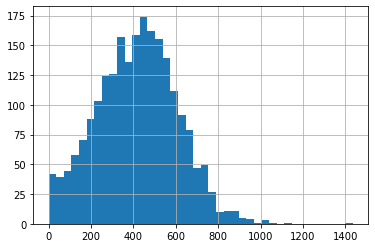

In [43]:
# Гистограмма минут для тарифа «Смарт»
all_users_by_months.loc[all_users_by_months['tariff'] == 'smart']['talked_for_minutes'].hist(bins=40)

Гистограмма минут для тарифа «Смарт» имеет нормальное распределение.

<AxesSubplot:>

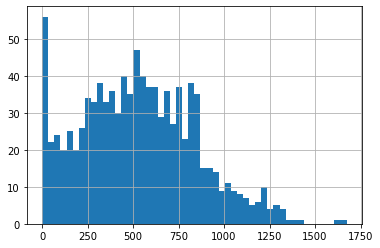

In [44]:
# Гистограмма минут для тарифа «Ультра»
all_users_by_months.loc[all_users_by_months['tariff'] == 'ultra']['talked_for_minutes'].hist(bins=50)

Гистограмма минут для тарифа «Ультра» тяготеет к нормальному распределению.

<AxesSubplot:>

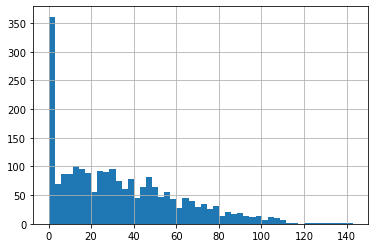

In [45]:
# Гистограмма сообщений для тарифа «Смарт»
all_users_by_months.loc[all_users_by_months['tariff'] == 'smart']['messages_count'].hist(bins=50)

<AxesSubplot:>

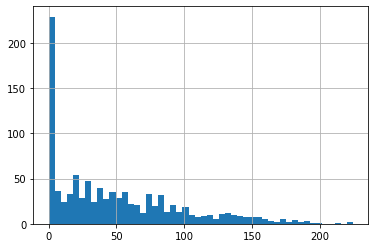

In [46]:
# Гистограмма сообщений для тарифа «Ультра»
all_users_by_months.loc[all_users_by_months['tariff'] == 'ultra']['messages_count'].hist(bins=50)

Гистограммы сообщений для тарифа «Смарт» и для тарифа «Ультра» имеют форму распределения Пуассона. Также по обоим гистограммам видно, что большое количество пользователей не используют или почти не используют сообщения.

<AxesSubplot:>

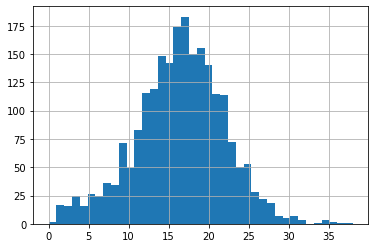

In [47]:
# Гистограмма интернета для тарифа «Смарт»
all_users_by_months.loc[all_users_by_months['tariff'] == 'smart']['spent_internet'].hist(bins=39)

Гистограмма интернета для тарифа «Смарт» имеет ярко выраженное нормальное распределение.

<AxesSubplot:>

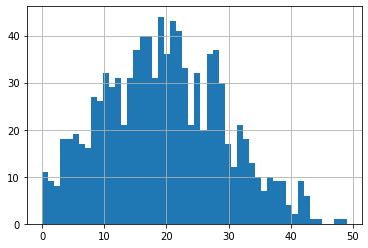

In [48]:
# Гистограмма интернета для тарифа «Ультра»
all_users_by_months.loc[all_users_by_months['tariff'] == 'ultra']['spent_internet'].hist(bins=50)

Гистограмма интернета для тарифа «Ультра» тяготеет к нормальному распределению.

## Проверка гипотез

Необходимо проверить следующие гипотезы:
+ Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
+ Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза №1

Сформулируем нулевую гипотезу и противоположную ей по смыслу альтернативную гипотезу.
+ <b>Нулевая гипотеза</b> — cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
+ <b>Альтернативная гипотеза</b> — средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.

Примем пороговое значение `alpha = 0.05` и используем метод `st.ttest_ind()` для проверки нулевой гипотезы.

In [49]:
alpha = 0.05
results = st.ttest_ind(
    all_users_by_months.loc[all_users_by_months['tariff'] == 'ultra']['profit'],
    all_users_by_months.loc[all_users_by_months['tariff'] == 'smart']['profit']
                  )
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


<b>Вывод:</b> отвергаем нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

### Гипотеза №2

Сформулируем нулевую гипотезу и противоположную ей по смыслу альтернативную гипотезу.
+ <b>Нулевая гипотеза</b> — средние выручки пользователей из Москвы и пользователей из других регионов равны.
+ <b>Альтернативная гипотеза</b> — средние выручки пользователей из Москвы и пользователей из других регионов не равны.


Примем пороговое значение `alpha = 0.05` и используем метод `st.ttest_ind()` для проверки нулевой гипотезы.

In [50]:
alpha = 0.05
results = st.ttest_ind(
    all_users_by_months.loc[all_users_by_months['city'] == 'Москва']['profit'],
    all_users_by_months.loc[all_users_by_months['city'] != 'Москва']['profit']
                  )
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b> нулевую гипотезу нельзя отвергнуть, поэтому наша `Гипотеза №2` не подтвердилась.

## Общий вывод

+ Пользователи обоих тарифов почти не пользуются сообщениями, поэтому лимит в 1000 сообщений для тарифа «Ультра» скорее маркетинг, нежели реальная потребность пользователей. То же касается и лимита в 3000 минут для тарифа «Ультра».
+ В среднем пользователи тарифа «Ультра» практически укладываются в лимиты тарифа «Смарт».
+ С точки зрения прибыли для «Мегалайн» тариф «Ультра» лучше, и рекламный бюджет лучше сконцентрировать на нём.
+ Имеет смысл рассмотреть возможность создания нового тарифа, который будет чем-то средним между «Смарт» и «Ультра».